<a href="https://colab.research.google.com/github/atiqurrahman2005/outdoor-Adventure-Booking-Analysis/blob/main/outdoor_Adventure_Booking_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1:Takeing Imports


In [82]:
#Takeing Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2:loading data

In [83]:
#loading data
df=pd.read_csv('Outdoor Adventure Bookings.csv')
output=[]
output.append("exploratory data Analysis to outdoor adventure bookings\n")
output.append("====================================\n")

## Step 3:Explore the data


In [84]:
#Reading data
print(df.head())
output.append(f"First few rows of data:\n{df.head()}\n")

         Date   Product Region Customer_Type  Quantity   Price  Discount  \
0  2024-04-12  Kayaking  South          Solo         5  497.79      0.14   
1  2024-08-31    Biking  South          Solo        10  369.33      0.21   
2  2024-05-16  Kayaking  North        Family         5  220.28      0.11   
3  2024-07-19   Camping   East        Family         2  126.63      0.22   
4  2024-12-25  Kayaking  North          Solo         3  147.51      0.29   

   Revenue  
0  2140.50  
1  2917.71  
2   980.25  
3   197.54  
4   314.20  


In [85]:
#Basic info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [86]:
#Discribe Data
print(df.describe())
output.append(f"Summary statistics:\n{df.describe()}\n")

          Quantity        Price     Discount      Revenue
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      5.551000   278.945650     0.148360  1332.119030
std       2.868035   130.505707     0.085235  1008.891235
min       1.000000    50.010000     0.000000    38.520000
25%       3.000000   167.245000     0.080000   507.310000
50%       6.000000   280.950000     0.150000  1070.835000
75%       8.000000   393.077500     0.220000  1939.747500
max      10.000000   497.790000     0.300000  4905.150000


## step 4:Clean the data

In [87]:
output.append("data Cleaning results:\n")
#Cheak for missing values
missing_values=df.isnull().sum()
print(missing_values)
output.append(f"Missing values:\n{missing_values}\n")

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [88]:
#Fill or drop missing values
df.dropna(inplace=True)

In [89]:
#Convert the date coloum to the datetime format
df['Date']=pd.to_datetime(df['Date'])

In [90]:
#check for duplicates
duplicates=df.duplicated().sum()
output.append(f"Number Of Duplicates Dropped: {duplicates}\n")
df.drop_duplicates(inplace=True)

## step 5:Analyze the data

In [91]:
#Total revenue form cleaning services
total_revenue=df['Revenue'].sum()
output.append(f'Total Revenue: ${total_revenue}\n')
print(f'Total Revenue: ${total_revenue}')

Total Revenue: $1332119.0299999998


In [92]:
#avarage price per coustomer_type wise
avarage_price_per_service = df.groupby('Customer_Type')['Price'].mean()
output.append("avarage_price_per_customer Type:\n")
output.append(f"{avarage_price_per_service}\n")
print(avarage_price_per_service)

Customer_Type
Family    276.897455
Solo      280.953287
Name: Price, dtype: float64


In [93]:
#Total services provided by region
total_services_by_region = df['Region'].value_counts()
output.append("Total Services Provided by Region:\n")
output.append(f"{total_services_by_region}\n")
print(total_services_by_region)

Region
South    263
North    253
West     252
East     232
Name: count, dtype: int64


In [94]:
#total revenue by region
revenue_by_region = df.groupby('Region')['Price'].sum()
output.append("Total Revenue by Region:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)

Region
East     61792.14
North    70020.65
South    76052.63
West     71080.23
Name: Price, dtype: float64


##step 6: Visualize the data

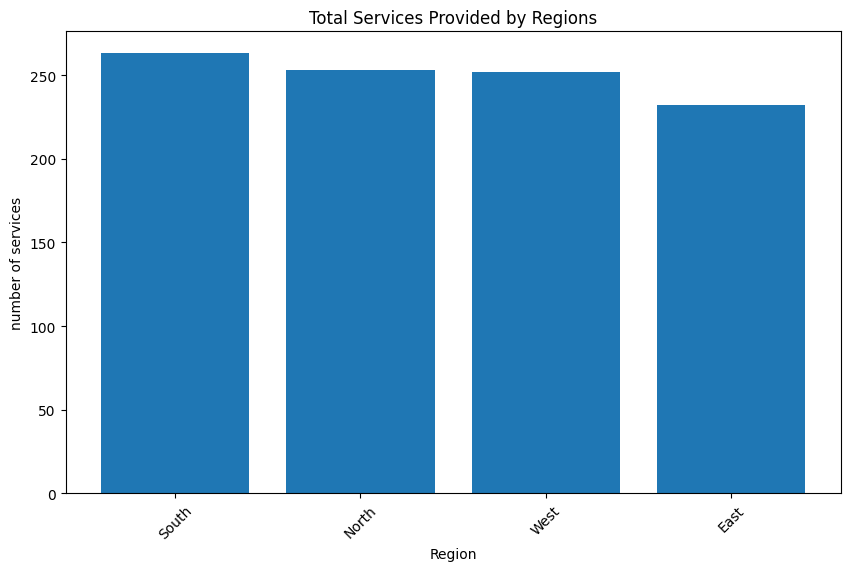

In [95]:
plt.figure(figsize=(10,6))
plt.bar(total_services_by_region.index, total_services_by_region.values)
plt.title('Total Services Provided by Regions')
plt.xlabel('Region')
plt.ylabel('number of services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png')
plt.show()

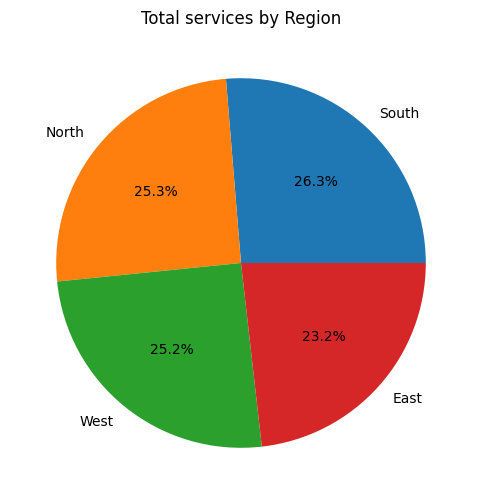

In [96]:
#pie_chart
plt.figure(figsize=(6, 6))
plt.pie(total_services_by_region.values, labels=total_services_by_region.index, autopct='%1.1f%%')
plt.title('Total services by Region')
plt.savefig('total_services_by_region.png')
plt.show()

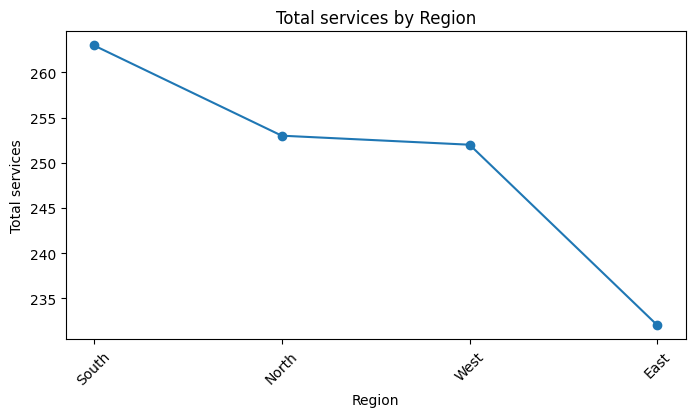

In [97]:
#line_chart
plt.figure(figsize=(8, 4))
plt.plot(total_services_by_region.index, total_services_by_region.values, marker='o')
plt.title('Total services by Region')
plt.xlabel('Region')
plt.ylabel('Total services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png')
plt.show()

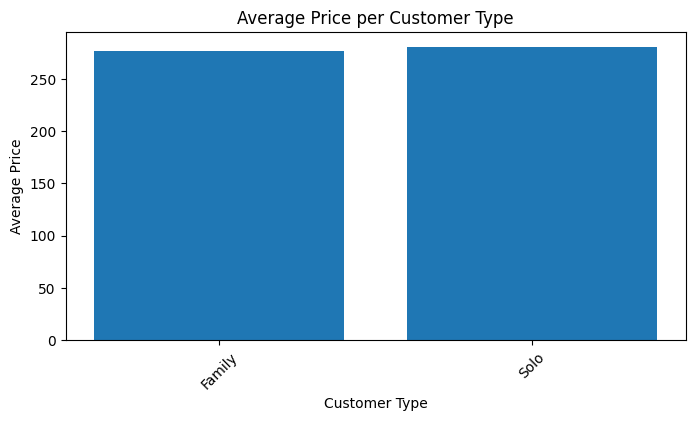

In [79]:
#bar_chart of sales of Corporate and Individual
plt.figure(figsize=(8, 4))
plt.bar(avarage_price_per_service.index, avarage_price_per_service  .values)
plt.title('Average Price per Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('avarage_price_per_service.png')
plt.show()

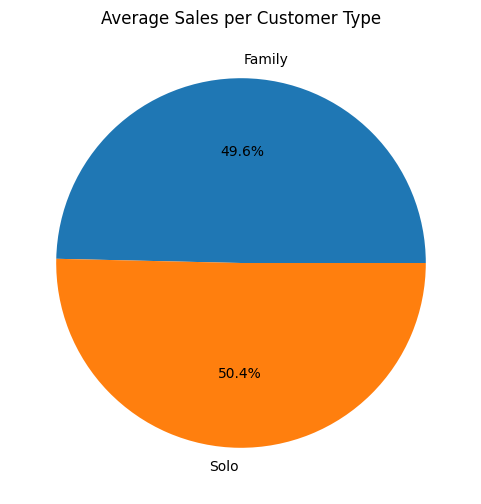

In [80]:
#pie_chart of sales of Corporate and Individual
plt.figure(figsize=(6, 6))
plt.pie(avarage_price_per_service.values, labels=avarage_price_per_service.index, autopct='%1.1f%%')
plt.title('Average Sales per Customer Type')
plt.savefig('avarage_price_per_service.png')
plt.show()

##Step 7: Save output to a text file


In [81]:
# save output to a text file
with open('analysis_output.txt', 'w') as f:
    f.writelines(output)